In [1]:
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from glob import glob
import os

c:\Users\Admin\AppData\Local\Programs\Anaconda\envs\gpu\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Anaconda\envs\gpu\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.11.0 and strictly below 2.14.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to enco

In [2]:
main_path = "C:\\Users\\Admin\\OneDrive - Đại học FPT- FPT University\\This PC\\Documents\\Datasets\\van-goph\\VincentVanGogh"
style_img_paths = []
for class_path in [os.path.join(main_path,class_name) for class_name in os.listdir(main_path)]:
    class_img_paths = glob(f"{class_path}/*")
    style_img_paths.extend(iter(class_img_paths))

print(f"There are {len(style_img_paths)} style images in Van Gogh Paintings Dataset")

There are 2025 style images in Van Gogh Paintings Dataset


In [3]:
main_path = "C:\\Users\\Admin\\OneDrive - Đại học FPT- FPT University\\This PC\\Documents\\Datasets\\natural-images\\natural_images"
normal_img_paths = []
for class_path in [os.path.join(main_path,class_name) for class_name in os.listdir(main_path)]:
    class_img_paths = glob(f"{class_path}/*")
    normal_img_paths.extend(iter(class_img_paths))

print(f"There are {len(normal_img_paths)} natural images in the Natural Images Dataset")

There are 6899 natural images in the Natural Images Dataset


In [4]:
style_images = []
normal_images = []

for style_path in style_img_paths:
    img = Image.open(style_path)
    img = img.resize((128, 128))
    img = img.convert("RGB")
    style_images.append(img)
    
for normal_path in normal_img_paths:
    img = Image.open(normal_path)
    img = img.resize((128, 128))
    img = img.convert("RGB")
    normal_images.append(img)

style_images = tf.data.Dataset.from_tensor_slices(np.stack([np.array(img, dtype=np.float32) for img in style_images]) / 127.5 - 1).batch(1)
normal_images = tf.data.Dataset.from_tensor_slices(np.stack([np.array(img, dtype=np.float32) for img in normal_images]) / 127.5 - 1).batch(1)

print("Number of style images in the TensorFlow Dataset:", len(list(style_images.as_numpy_iterator())))
print("Number of normal images in the TensorFlow Dataset:", len(list(normal_images.as_numpy_iterator())))

Number of style images in the TensorFlow Dataset: 2025
Number of normal images in the TensorFlow Dataset: 6899


C:\Users\Admin\AppData\Local\Temp\ipykernel_24200\423932490.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 4, i + 1)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for

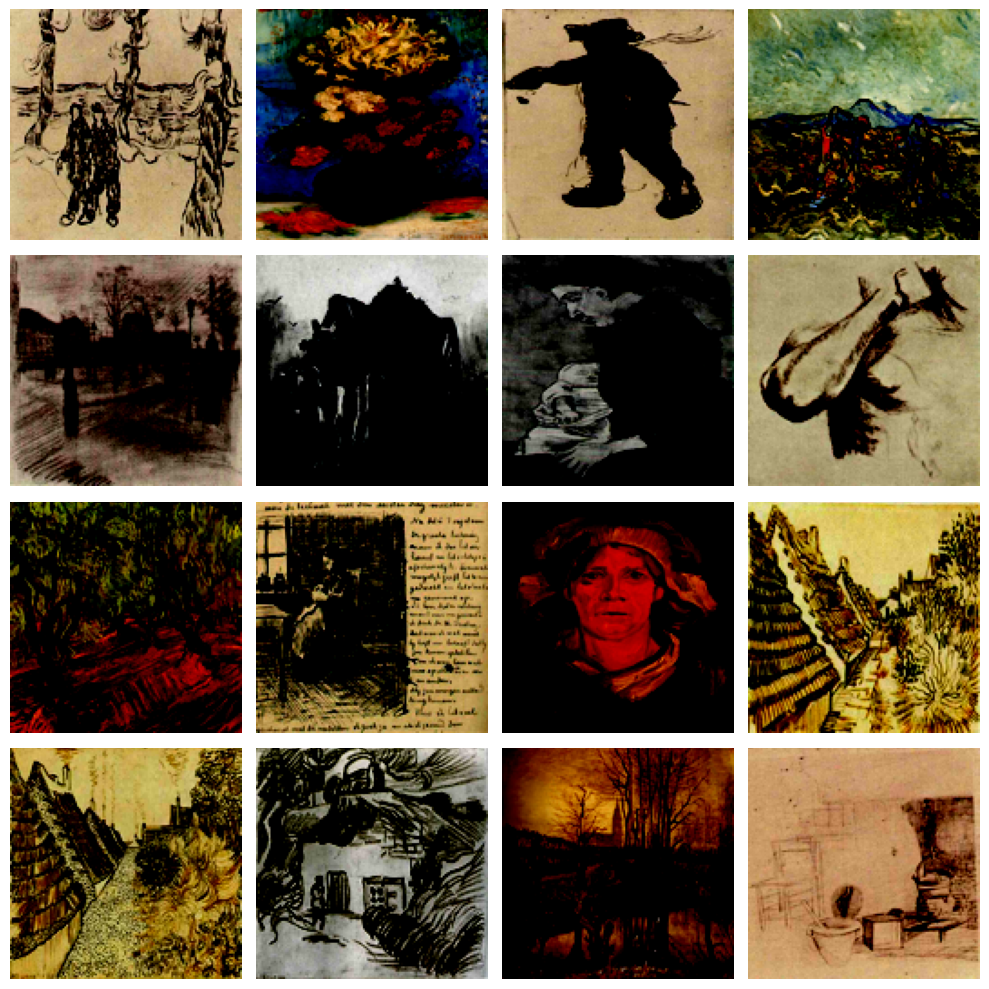

In [5]:
plt.figure(figsize=(10, 10))
plt.title("Style Images")
for i, image in enumerate(style_images.shuffle(10000).take(16)):
    plt.subplot(4, 4, i + 1)
    plt.imshow(image[0])
    plt.axis("off")
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_24200\1399131515.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 4, i + 1)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] fo

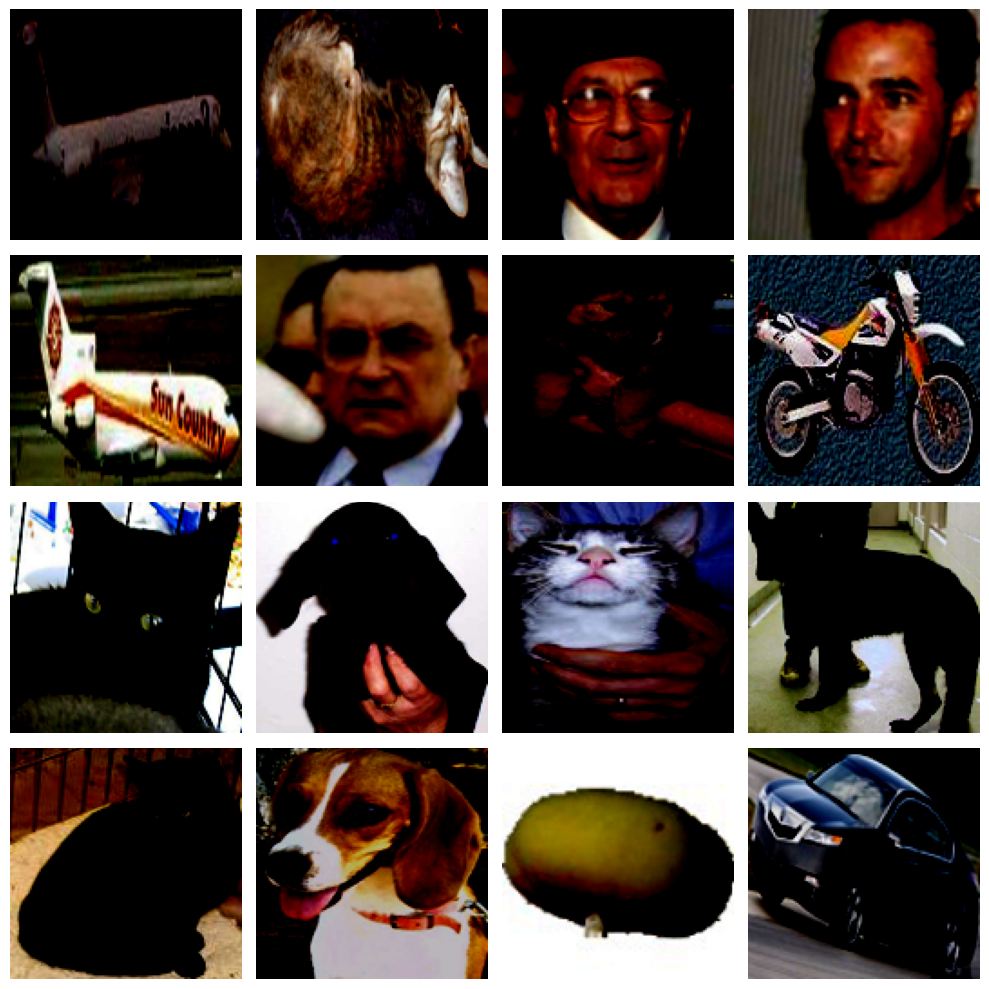

In [6]:
plt.figure(figsize=(10, 10))
plt.title("Normal Images")
for i, image in enumerate(normal_images.shuffle(10000).take(16)):
    plt.subplot(4, 4, i + 1)
    plt.imshow(image[0])
    plt.axis("off")
plt.tight_layout()
plt.show()

# Generator

In [7]:
OUTPUT_CHANNELS = len(["Red", "Green", "Blue"])

def downsample(filters, size, apply_instancenorm=True):
    initializer = tf.random_normal_initializer(0., 0.02)
    gamma_init = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
    
    result = tf.keras.Sequential()
    result.add(tf.keras.layers.Conv2D(filters, size, strides=2, padding="same", kernel_initializer=initializer, use_bias=False))
    
    if apply_instancenorm:
        result.add(tfa.layers.InstanceNormalization(gamma_initializer=gamma_init))
    
    result.add(tf.keras.layers.LeakyReLU())
    return result

def upsample(filters, size, apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)
    gamma_init = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
    
    result = tf.keras.Sequential()
    result.add(tf.keras.layers.Conv2DTranspose(filters, size, strides=2, padding="same", kernel_initializer=initializer, use_bias=False))
    
    result.add(tfa.layers.InstanceNormalization(gamma_initializer=gamma_init))
    
    if apply_dropout:
        result.add(tf.keras.layers.Dropout(0.5))
    
    result.add(tf.keras.layers.ReLU())
    return result

def Generator():
    inputs = tf.keras.layers.Input([128, 128, 3])
    
    down_stack = [downsample(128, 4), # 64x64x128
                downsample(256, 4), # 32x32x256
                downsample(512, 4), # 16x16x512
                downsample(512, 4), # 8x8x512
                downsample(512, 4), # 4x4x512
                downsample(512, 4), # 2x2x512
                downsample(512, 4), # 1x1x512
                ]
    
    up_stack = [upsample(512, 4, apply_dropout=True), # 2x2
                upsample(512, 4, apply_dropout=True), # 4x4
                upsample(512, 4), # 8x8
                upsample(256, 4), # 16x16
                upsample(128, 4), # 32x32
                upsample(64, 4),  # 64x64
                ]
    
    initializer = tf.random_normal_initializer(0., 0.02)
    last = last = tf.keras.layers.Conv2DTranspose(OUTPUT_CHANNELS, 4, strides=2, padding='same', kernel_initializer=initializer, activation='tanh')
    x = inputs
    skips = []
    
    for down in down_stack:
        x = down(x)
        skips.append(x)
    skips = reversed(skips[:-1])
    
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = tf.keras.layers.Concatenate()([x, skip])
    x = last(x)
    
    return tf.keras.Model(inputs=inputs, outputs=x)

# Discriminator

In [8]:
def Discriminator():
    initializer = tf.random_normal_initializer(0., 0.02)
    gamma_init = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
    
    inp = tf.keras.layers.Input([128, 128, 3], name="input_image")
    x = inp
    
    down1 = downsample(64, 4, False)(x) # 64x64x64
    down2 = downsample(128, 4, False)(down1) # 32x32x128
    
    zero_pad1 = tf.keras.layers.ZeroPadding2D()(down2)
    
    conv = tf.keras.layers.Conv2D(512, 4, strides=1, kernel_initializer=initializer, use_bias=False)(zero_pad1) # (bs, 31, 31, 512)
    
    norm1 = tfa.layers.InstanceNormalization(gamma_initializer=gamma_init)(conv)
    
    leaky_relu = tf.keras.layers.LeakyReLU()(norm1)
    
    zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)
    
    last = tf.keras.layers.Conv2D(1, 4, strides=1, kernel_initializer=initializer)(zero_pad2)
    
    return tf.keras.Model(inputs=inp, outputs=last)

# CycleGAN Model

In [9]:
vangogh_generator = Generator()
photo_generator = Generator()

vangogh_discriminator = Discriminator()
photo_discriminator = Discriminator()

In [10]:
class CycleGAN(tf.keras.Model):
    def __init__(self,
                vangogh_generator,
                photo_generator,
                vangogh_discriminator,
                photo_discriminator,
                lambda_cycle = 10,
                ):
        super(CycleGAN,self).__init__()
        self.v_gen = vangogh_generator
        self.p_gen = photo_generator
        self.v_disc = vangogh_discriminator
        self.p_disc = photo_discriminator
        self.lambda_cycle = lambda_cycle

    def compile(self,
                v_gen_optimizer,
                p_gen_optimizer,
                p_disc_optimizer,
                gen_loss_fn,
                disc_loss_fn,
                cycle_loss_fn,
                identity_loss_fn,
                v_disc_optimizer
                ):
        super(CycleGAN,self).compile()
        self.v_gen_optimizer = v_gen_optimizer
        self.p_gen_optimizer =  p_gen_optimizer
        self.v_disc_optimizer  = v_disc_optimizer
        self.gen_loss_fn = gen_loss_fn
        self.disc_loss_fn = disc_loss_fn
        self.cycle_loss_fn = cycle_loss_fn
        self.identity_loss_fn = identity_loss_fn
        self.p_disc_optimizer = p_disc_optimizer

    def train_step(self, batch_data):
        real_vangogh, real_photo = batch_data
        
        with tf.GradientTape(persistent=True) as tape:
            # photo to vangogh back to photo
            fake_vangogh = self.v_gen(real_photo,training=True)
            cycled_photo = self.p_gen(fake_vangogh,training=True)
            
            # vangogh to photo back to vangogh
            fake_photo = self.p_gen(real_vangogh,training=True)
            cycled_vangogh = self.v_gen(fake_photo,training=True)
            
            # generating itself
            same_photo = self.p_gen(real_photo,training=True)
            same_vangogh = self.v_gen(real_vangogh,training=True)
            
            # checking images using discriminator
            disc_real_vangogh = self.v_disc(real_vangogh,training=True)
            disc_real_photo = self.p_disc(real_photo,training=True)
            
            disc_fake_vangogh = self.v_disc(fake_vangogh,training=True)
            disc_fake_photo = self.p_disc(fake_photo,training=True)
            
            # computing generator loss
            vangogh_gen_loss = self.gen_loss_fn(disc_fake_vangogh)
            photo_gen_loss = self.gen_loss_fn(disc_fake_photo)
            
            # computing total cycle loss
            total_cycle_loss = self.cycle_loss_fn(real_vangogh,cycled_vangogh,self.lambda_cycle) + self.cycle_loss_fn(real_photo,cycled_photo,self.lambda_cycle)
            
            # computing total loss
            total_vangogh_gen_loss = vangogh_gen_loss + total_cycle_loss + self.identity_loss_fn(real_vangogh, same_vangogh, self.lambda_cycle)
            total_photo_gen_loss = photo_gen_loss + total_cycle_loss + self.identity_loss_fn(real_photo, same_photo, self.lambda_cycle)
            
            # computing discriminator loss
            vangogh_disc_loss = self.disc_loss_fn(disc_real_vangogh,disc_fake_vangogh)
            photo_disc_loss = self.disc_loss_fn(disc_real_photo,disc_fake_photo)
        
        # calculating gradients of networks
        vangogh_generator_gradients = tape.gradient(total_vangogh_gen_loss,self.v_gen.trainable_variables)
        photo_generator_gradients = tape.gradient(total_photo_gen_loss,self.p_gen.trainable_variables)
        
        vangogh_discriminator_gradients = tape.gradient(vangogh_disc_loss,self.v_disc.trainable_variables)
        photo_discriminator_gradients = tape.gradient(photo_disc_loss,self.p_disc.trainable_variables)
        
        self.v_gen_optimizer.apply_gradients(zip(vangogh_generator_gradients,self.v_gen.trainable_variables))
        self.p_gen_optimizer.apply_gradients(zip(photo_generator_gradients,self.p_gen.trainable_variables))
        
        self.v_disc_optimizer.apply_gradients(zip(vangogh_discriminator_gradients, self.v_disc.trainable_variables))
        self.p_disc_optimizer.apply_gradients(zip(photo_discriminator_gradients, self.p_disc.trainable_variables))
        
        return {
            "v_gen_loss": total_vangogh_gen_loss,
            "p_gen_loss": total_photo_gen_loss,
            "v_disc_loss": vangogh_disc_loss,
            "p_disc_loss": photo_disc_loss
        }

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)
def discriminator_loss(real,generated):
    real_loss = cross_entropy(tf.ones_like(real),real)
    generated_loss = cross_entropy(tf.zeros_like(generated),generated)
    total_loss = real_loss + generated_loss
    return total_loss * 0.5

def generator_loss(generated):
    return cross_entropy(tf.ones_like(generated),generated)

def cycle_loss(real_image,cycled_image,LAMBDA):
    return tf.reduce_mean(tf.abs(real_image - cycled_image)) * LAMBDA

def identity_loss(real_image,same_image,LAMBDA):
    return tf.reduce_mean(tf.abs(real_image - same_image)) * LAMBDA

vangogh_generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
photo_generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

vangogh_discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
photo_discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

# Training

In [11]:
model = CycleGAN(vangogh_generator=vangogh_generator,
                photo_generator=photo_generator,
                vangogh_discriminator=vangogh_discriminator,
                photo_discriminator=photo_discriminator
                )

model.compile(v_gen_optimizer=vangogh_generator_optimizer,
            p_gen_optimizer=photo_generator_optimizer,
            p_disc_optimizer=photo_discriminator_optimizer,
            v_disc_optimizer=vangogh_discriminator_optimizer,
            gen_loss_fn=generator_loss,
            disc_loss_fn=discriminator_loss,
            cycle_loss_fn=cycle_loss,
            identity_loss_fn=identity_loss
            )

In [12]:
with tf.device('/device:gpu:0'):
    model.fit(tf.data.Dataset.zip((style_images, normal_images)), epochs=10)
    model.save_weights("cyclegan.h5")

Epoch 1/10
2025/2025 [==============================] - 959s 457ms/step - v_gen_loss: 7.5301 - p_gen_loss: 7.0739 - v_disc_loss: 0.5905 - p_disc_loss: 0.5717
Epoch 2/10
2025/2025 [==============================] - 930s 459ms/step - v_gen_loss: 5.8987 - p_gen_loss: 5.8068 - v_disc_loss: 0.5908 - p_disc_loss: 0.5834
Epoch 3/10
2025/2025 [==============================] - 952s 470ms/step - v_gen_loss: 5.3267 - p_gen_loss: 5.2639 - v_disc_loss: 0.5698 - p_disc_loss: 0.5735
Epoch 4/10
2025/2025 [==============================] - 946s 467ms/step - v_gen_loss: 5.0787 - p_gen_loss: 4.9759 - v_disc_loss: 0.5605 - p_disc_loss: 0.5595
Epoch 5/10
2025/2025 [==============================] - 960s 474ms/step - v_gen_loss: 4.9465 - p_gen_loss: 4.8073 - v_disc_loss: 0.5431 - p_disc_loss: 0.5472
Epoch 6/10
2025/2025 [==============================] - 956s 472ms/step - v_gen_loss: 4.8761 - p_gen_loss: 4.7118 - v_disc_loss: 0.5260 - p_disc_loss: 0.5324
Epoch 7/10
2025/2025 [==============================

# Inference

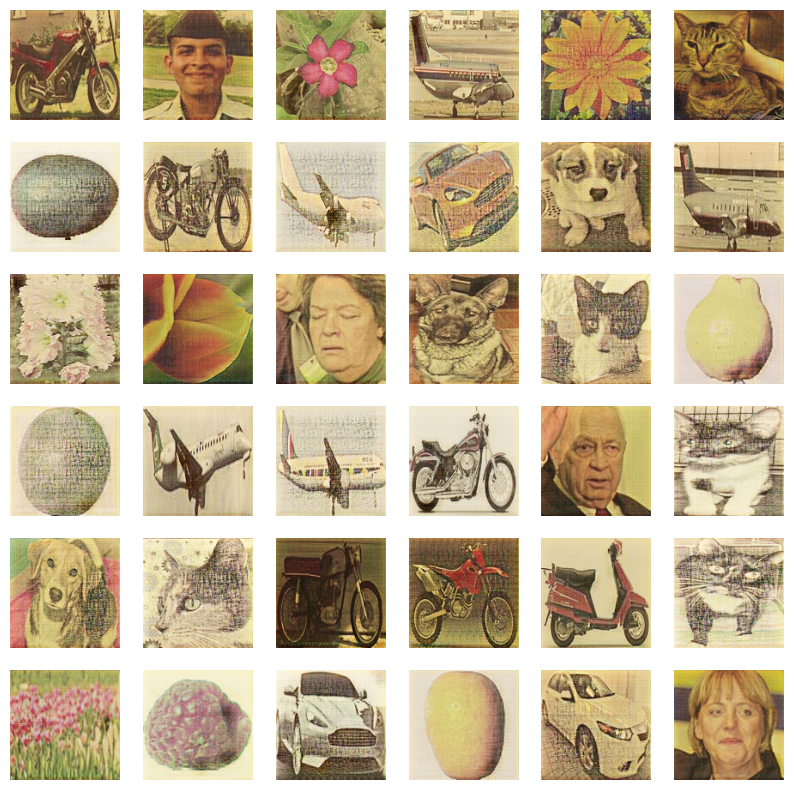

In [13]:
plt.figure(figsize=(10, 10))
for i, image in enumerate(normal_images.shuffle(10000).take(36)):
    plt.subplot(6,6,i+1)
    prediction = vangogh_generator(image, training=False)[0].numpy()
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    plt.imshow(X = prediction)
    plt.axis("off")
    if i == 36:
        break
plt.show()